In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
import numpy as np

In [2]:
df = pd.read_csv('dataset_DR_nonDR.csv', sep='\t')
df

,bps1,bps2,bps3,bps4,bps5,bps6,bps7,bps8,bps9,bps10,bps11,bps12,bps13,bps14,bps15,Target
0,-1.84,-2.24,-1.44,-1.28,-1.84,-2.24,-1.44,-1.44,-1.30,-0.88,-1.44,-2.27,-1.28,-1.220368,-1.219930,0
1,-1.84,-2.24,-2.27,-1.28,-1.44,-1.44,-1.00,-1.00,-1.28,-1.45,-1.00,-1.30,-1.30,-1.220368,-1.219930,0
2,-1.00,-1.44,-2.27,-1.45,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-1.00,-1.44,-2.27,-1.450000,-0.880000,0
3,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-2.27,-2.24,-1.44,-1.00,-1.00,-1.00,-1.28,-1.450000,-1.000000,0
4,-1.00,-1.44,-1.30,-1.00,-1.00,-1.45,-1.84,-1.45,-1.45,-1.28,-1.00,-1.00,-1.28,-1.450000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,-2.27,-2.24,-1.30,-0.88,-0.58,-0.88,-1.00,-0.58,-1.30,-1.44,-1.00,-1.00,-1.00,-0.580000,-1.223099,1
628,-0.58,-1.45,-1.84,-2.24,-1.84,-1.44,-1.00,-1.44,-1.44,-1.44,-1.44,-1.00,-1.28,-1.280000,-1.223099,1
629,-1.00,-0.58,-1.00,-0.88,-0.58,-1.00,-0.88,-1.00,-1.00,-0.58,-1.00,-1.30,-1.30,-1.450000,-1.223099,1
630,-1.00,-1.00,-1.30,-1.30,-1.00,-0.88,-1.00,-0.58,-1.45,-2.24,-1.44,-0.58,-1.00,-1.300000,-1.223099,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred = rf_classifier.predict(X_test)

In [6]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)



Accuracy: 0.8582677165354331
Confusion matrix:
[[64  9]
 [ 9 45]]
Precision: 0.8550228310502284
Recall: 0.8550228310502284
F1-Score: 0.8550228310502284


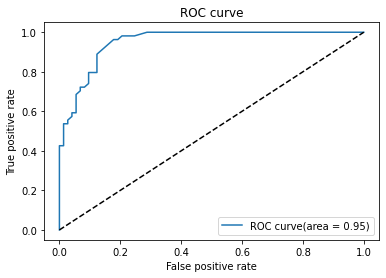

In [7]:
# ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# ROC plot
plt.plot(fpr, tpr, label='ROC curve(area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [8]:
# Defining the number of folds for cross-validation
num_folds = 10

modelo = RandomForestClassifier()

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy') 

print(f"Scoring of each fold: {scores}")

print(f"Average of cross validation: {scores.mean():.2f}")
print(f"Standard deviation of cross validation: {scores.std():.2f}")


Scoring of each fold: [0.828125   0.859375   0.92063492 0.9047619  0.92063492 0.92063492
 0.92063492 0.93650794 0.9047619  0.9047619 ]
Average of cross validation: 0.90
Standard deviation of cross validation: 0.03
